In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/nagarjuna843/Decision-Tree/main/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
inputs=df.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis='columns')
target=df['Survived']
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [4]:
inputs['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [7]:
inputs['Pclass_n']=LabelEncoder().fit_transform(inputs['Pclass'])
inputs['Sex_n']=LabelEncoder().fit_transform(inputs['Sex'])
inputs['Age_n']=LabelEncoder().fit_transform(inputs['SibSp'])
inputs['Parch']=LabelEncoder().fit_transform(inputs['Parch'])
inputs['Fare_n']=LabelEncoder().fit_transform(inputs['Fare'])
inputs['Embarked_n']=LabelEncoder().fit_transform(inputs['Embarked'].astype(str))
inputs

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_n,Sex_n,Age_n,Fare_n,Embarked_n
0,3,male,22.000000,1,0,7.2500,S,2,1,1,18,2
1,1,female,38.000000,1,0,71.2833,C,0,0,1,207,0
2,3,female,26.000000,0,0,7.9250,S,2,0,0,41,2
3,1,female,35.000000,1,0,53.1000,S,0,0,1,189,2
4,3,male,35.000000,0,0,8.0500,S,2,1,0,43,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S,1,1,0,85,2
887,1,female,19.000000,0,0,30.0000,S,0,0,0,153,2
888,3,female,29.699118,1,2,23.4500,S,2,0,1,131,2
889,1,male,26.000000,0,0,30.0000,C,0,1,0,153,0


In [8]:
inputs_n=inputs.drop(['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'],axis='columns')
inputs_n

,Pclass_n,Sex_n,Age_n,Fare_n,Embarked_n
0,2,1,1,18,2
1,0,0,1,207,0
2,2,0,0,41,2
3,0,0,1,189,2
4,2,1,0,43,2
...,...,...,...,...,...
886,1,1,0,85,2
887,0,0,0,153,2
888,2,0,1,131,2
889,0,1,0,153,0


In [9]:
model=tree.DecisionTreeClassifier()

In [10]:
model.fit(inputs_n,target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
model.score(inputs_n,target)

0.920314253647587

[Text(357.3072916666667, 531.7826086956522, 'X[1] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(135.54427083333334, 508.14782608695657, 'X[0] <= 1.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(55.54166666666667, 484.5130434782609, 'X[3] <= 149.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(43.91666666666667, 460.8782608695652, 'X[3] <= 147.5\ngini = 0.18\nsamples = 70\nvalue = [7, 63]'),
 Text(38.75, 437.2434782608696, 'X[3] <= 138.5\ngini = 0.159\nsamples = 69\nvalue = [6, 63]'),
 Text(33.583333333333336, 413.60869565217394, 'X[2] <= 0.5\ngini = 0.183\nsamples = 59\nvalue = [6, 53]'),
 Text(15.5, 389.9739130434783, 'X[3] <= 86.0\ngini = 0.133\nsamples = 42\nvalue = [3, 39]'),
 Text(10.333333333333334, 366.33913043478265, 'X[4] <= 1.5\ngini = 0.204\nsamples = 26\nvalue = [3, 23]'),
 Text(5.166666666666667, 342.704347826087, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(15.5, 342.704347826087, 'X[3] <= 84.0\ngini = 0.227\nsamples = 23\nvalue 

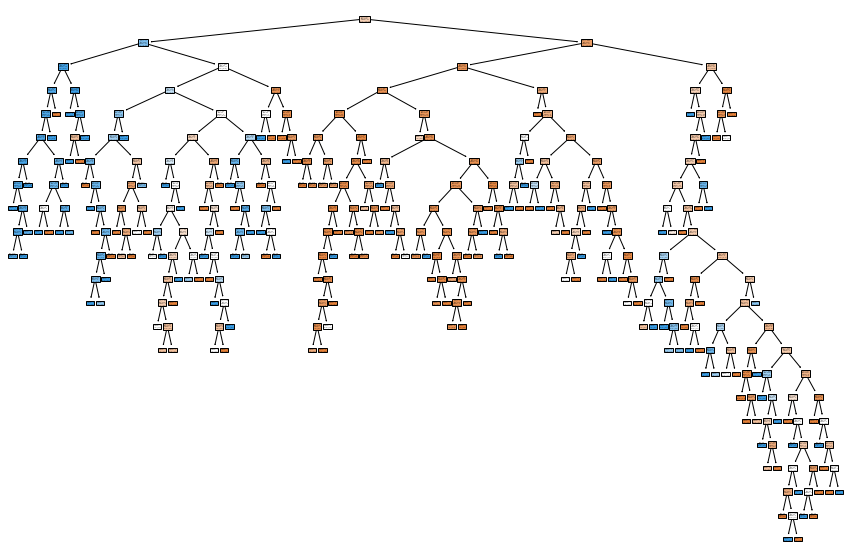

In [12]:
clf=model.fit(inputs_n,target)
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [15]:
feature_importance=pd.DataFrame(model.feature_importances_,inputs_n.columns,columns=['Importance'])
feature_importance.sort_values('Importance',ascending=False).round(2)

,Importance
Fare_n,0.39
Sex_n,0.39
Pclass_n,0.11
Age_n,0.06
Embarked_n,0.04


In [17]:
predict=model.predict(inputs_n)
output=pd.DataFrame({'fare':df.Fare,'sex':df.Sex,'pclass_n':df.Pclass,'age':df.Age,'Survived_predicted':predict,'Survived_actual':df.Survived})
output

,fare,sex,pclass_n,age,Survived_predicted,Survived_actual
0,7.2500,male,3,22.0,0,0
1,71.2833,female,1,38.0,1,1
2,7.9250,female,3,26.0,1,1
3,53.1000,female,1,35.0,1,1
4,8.0500,male,3,35.0,0,0
...,...,...,...,...,...,...
886,13.0000,male,2,27.0,0,0
887,30.0000,female,1,19.0,1,1
888,23.4500,female,3,NaN,0,0
889,30.0000,male,1,26.0,1,1
